# Principal Component Analysis

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [5]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
x = pd.DataFrame(iris.data,columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Applying PCA
- In this dataset we have 4 columns so the dimensionality is 4
- we reduce 4D to 1D
## Steps:-
- Apply MinMaxScaler or StandardScaler -> Normalizing Data
- Create Covariance Matrix (cov())
- Calculate Eigen value and Eigen vector (eig())
- Extract only the Eigen value that is maximum with its corresponding eigen vectoe
- Projuct the data on to that Eigen Vector (dot())
- The dimensionality is reduced

In [12]:
# Satndard Scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
#Createing Covariance
rows = x_scaled.T
rows

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [14]:
covariance_matrix = np.cov(rows)
print(covariance_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [24]:
# Creating Eigen Vector
eig_vals,eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigen Vectors \n',eig_vecs)
print('\nEigen Values',eig_vals)

Eigen Vectors 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigen Values [2.93808505 0.9201649  0.14774182 0.02085386]


In [25]:
for i in range(len(eig_vals)):
    print(eig_vals[i]/sum(eig_vals))

0.7296244541329988
0.22850761786701773
0.036689218892828716
0.005178709107154775


In [26]:
eig_vecs.T
eig_vals.T[0]

2.9380850501999936

In [27]:
projected_x = x_scaled.dot(eig_vecs.T[0])
projected_x

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

In [28]:
df = pd.DataFrame(projected_x,columns=['PC1'])
df['y-axis'] = 0.0
df['target'] = y
df

,PC1,y-axis,target
0,-2.264703,0.0,0
1,-2.080961,0.0,0
2,-2.364229,0.0,0
3,-2.299384,0.0,0
4,-2.389842,0.0,0
...,...,...,...
145,1.870503,0.0,2
146,1.564580,0.0,2
147,1.521170,0.0,2
148,1.372788,0.0,2


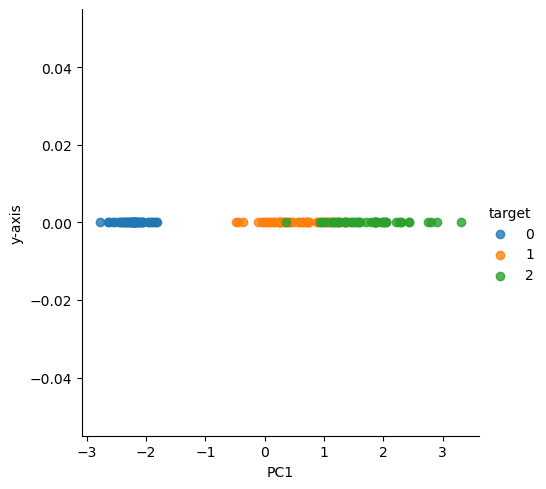

In [32]:
sns.lmplot(
    x='PC1', 
    y='y-axis', 
    data=df, 
    fit_reg=False, 
    hue='target', 
)


In [34]:
pca = PCA(n_components=1)
projected_x = pca.fit_transform(x_scaled)

In [35]:
df1 = pd.DataFrame(projected_x,columns=['PC1'])
df1['y-axis'] = 0.0
df1['target'] = y

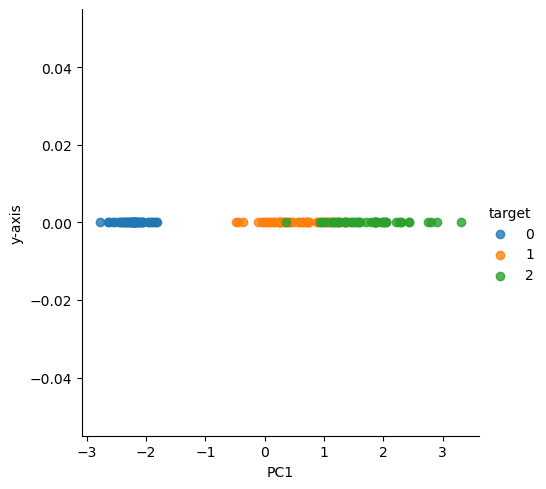

In [39]:
sns.lmplot(x='PC1',
           y='y-axis',
           data=df1,
           fit_reg=False,
           hue='target')

In [40]:
print(x_scaled.shape)

(150, 4)


In [41]:
print(projected_x.shape)

(150, 1)


In [51]:
# Using this data to train ML model
data = projected_x.reshape(-1,1)

In [52]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2)

In [53]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [54]:
model.score(x_test,y_test)

0.9